In [1]:
import sys
import numpy as np
import pandas as pd
sys.path.append( "../../lattice/")
sys.path.append("../")
sys.path.append( "../../impurity/")

from HC_Lattice import HC_Lattice
from DMET_solver import DMET_solver
from Impurity_solver import Impurity_solver
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

def print_rho(rho,vmin=0,vmax=0.5,name="myfig.eps"):
    plt.figure()
    rho_to_plot = pd.DataFrame((rho))
    rho_to_plot.rename(columns={0:'$I_{up}$',1:'$B_{up}$',2:'$I_{down}$',3:'$B_{down}$'}, 
                     inplace=True)
    rho_to_plot.rename(index={0:'$I_{up}$',1:'$B_{up}$',2:'$I_{down}$',3:'$B_{down}$'}, 
                     inplace=True)
    print(rho_to_plot)
    seaborn.heatmap(rho_to_plot,cmap="Blues",vmin=vmin,vmax=vmax)
    plt.savefig(name)
    plt.plot()




/home/romain/.conda/envs/DRL/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/romain/.conda/envs/DRL/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


../../mean_field/


## First system : 2 sites ; U = 0

In [2]:
#Create the lattice
ls=2
lattice = HC_Lattice(height=ls, length=ls)
# initialize DMET_solver
n=2
print(n)
t=1
u=0
lattice_size=[ls,ls]
#solve the system
dms = DMET_solver( t, u, n, lattice_size,[1],[1,2])


2


In [3]:
np.around(dms.get_mean_field_orbitals(dms.potential),1)

array([[0.7+0.j, 0. +0.j],
       [0.7-0.j, 0. +0.j],
       [0. +0.j, 0.7+0.j],
       [0. +0.j, 0.7-0.j]])

In [4]:
np.around(dms.get_schmidt_orbitals([1]),1)

MF orbitals
[[0.70710678+0.j 0.        +0.j]
 [0.70710678-0.j 0.        +0.j]
 [0.        +0.j 0.70710678+0.j]
 [0.        +0.j 0.70710678-0.j]]
Lines corresponding to the impurity
[0, 2]
Matrix corresponding to impurity
[[0.71+0.j 0.  +0.j]
 [0.  +0.j 0.71+0.j]]
Rotated Matrix
[[0.71+0.j 0.  +0.j]
 [0.71+0.j 0.  +0.j]
 [0.  +0.j 0.71+0.j]
 [0.  +0.j 0.71+0.j]]
Entangled environment orbitals
[[0.71+0.j 0.  +0.j]
 [0.  +0.j 0.71+0.j]]
orthogonal basis
[[1.+0.j 0.+0.j]
 [0.-0.j 1.+0.j]]
W up
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
W down
[[1.+0.j 0.+0.j]
 [0.-0.j 1.+0.j]]
W
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.-0.j 1.+0.j]]


array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.-0.j, 1.+0.j]])

In [5]:
print(dms.potential)
np.around(dms.get_rho_from_u(dms.potential),2)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


array([[0.5, 0.5, 0. , 0. ],
       [0.5, 0.5, 0. , 0. ],
       [0. , 0. , 0.5, 0.5],
       [0. , 0. , 0.5, 0.5]])

In [6]:
rho_tmp=np.around(dms.get_rho_impurity(verbose=True),2)
print("*** impurity***")
print(rho_tmp)
print(rho_tmp[np.ix_(np.arange(len(dms.impurity_sites)),np.arange(len(dms.impurity_sites)))])

print("****MF*****")
rho_mf_tmp = dms.get_rho_from_u(dms.potential)
index= dms.impurity_sites
print(rho_mf_tmp)
print(rho_mf_tmp[np.ix_(index,index)])

print(dms.density_norm(rho_mf_tmp,rho_tmp))

[[ 0. +0.j  0. +0.j  0. +0.j  0.5-0.j  0. +0.j  0. +0.j -0.5+0.j  0. +0.j
   0. +0.j  0.5+0.j  0. +0.j  0. +0.j  0.5+0.j  0. +0.j  0. +0.j  0. +0.j]]
new ground state
[ 0. +0.j  0. +0.j  0. +0.j  0.5-0.j  0. +0.j  0. +0.j -0.5+0.j  0. +0.j
  0. +0.j  0.5+0.j  0. +0.j  0. +0.j  0.5+0.j  0. +0.j  0. +0.j  0. +0.j]
*** impurity***
[[0.5+0.j 0. +0.j 0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j 0. +0.j 0.5+0.j]
 [0.5+0.j 0. +0.j 0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j 0. +0.j 0.5+0.j]]
[[0.5+0.j]]
****MF*****
[[0.5 0.5 0.  0. ]
 [0.5 0.5 0.  0. ]
 [0.  0.  0.5 0.5]
 [0.  0.  0.5 0.5]]
[[0.5]]
4.1540741810552243e-16


In [7]:
dms.solve_system()


Last potential's move : 19.72894760441206
density dif : 1.4175245223818118
Last potential's move : 1.147585677492877
density dif : 0.9340166470792856
Last potential's move : 1.037076253611614
density dif : 0.9312887010509081
Last potential's move : 1.023770505540504
density dif : 0.8860836020007913
Last potential's move : 1.01683014576599
density dif : 0.8421488176947464
Last potential's move : 1.0167020011829104
density dif : 0.8105491769176374
Last potential's move : 1.0229755835809395
density dif : 0.7783412926601205
Last potential's move : 0.887344065437989
density dif : 0.7723384953262902
Last potential's move : 0.6806056684635272
density dif : 0.7394374703044236
Last potential's move : 0.7331495522171202
density dif : 0.7167337104460669
Last potential's move : 0.47699905399937154
density dif : 0.706202300226184
Last potential's move : 0.4869791093911296
density dif : 0.7054992913629462
Last potential's move : 0.4785551793683743
density dif : 0.6882714734559098
Last potential's mo

Last potential's move : 25.55406882411455
density dif : 0.007966976075475554
Last potential's move : 23.023676916343295
density dif : 0.007396406400203108
Last potential's move : 24.011725517045832
density dif : 0.006751740062299831
Last potential's move : 25.04147254053369
density dif : 0.0063100471067054995
Last potential's move : 26.116109009585845
density dif : 0.0059038564792655915
Last potential's move : 27.236142402538583
density dif : 0.005492929798715653
Last potential's move : 28.404953231997215
density dif : 0.005071963006698883
Last potential's move : 34.52327895123187
density dif : 0.004879093158950867
Last potential's move : 31.104308163117732
density dif : 0.004574756502630358
Last potential's move : 32.43907390685451
density dif : 0.004203151331699302
Last potential's move : 33.83039989692659
density dif : 0.0039150335476424245
Last potential's move : 35.28177981002689
density dif : 0.0037262687192441404
Last potential's move : 36.79543156249785
density dif : 0.00335493

Last potential's move : 3604.908831894514
density dif : 1.0000062151658011
Last potential's move : 3785.1542734892428
density dif : 0.9999931498269152
Last potential's move : 3974.4119871637085
density dif : 3.057129575305951e-05
Last potential's move : 4173.132586521897
density dif : 1.3718037646800328e-05
Last potential's move : 4381.789215847981
density dif : 1.503429109143754e-05
Last potential's move : 4600.878676640379
density dif : 1.428187283705181e-05
Last potential's move : 4830.9226104724075
density dif : 1.000018235664826
Last potential's move : 5072.468740996032
density dif : 0.999989155108519
Last potential's move : 5326.09217804583
density dif : 1.1823253328316185e-05
Last potential's move : 5592.396786948113
density dif : 1.6029345630996783e-05
Last potential's move : 5872.016626295532
density dif : 2.0493053749420393e-05
Last potential's move : 6165.617457610308
density dif : 3.1386679890294096e-05
Last potential's move : 6473.898330490818
density dif : 1.0814801623570

                $I_{up}$      $B_{up}$    $I_{down}$    $B_{down}$
$I_{up}$    5.000000e-01  5.000000e-01  4.858515e-08  6.592932e-13
$B_{up}$    5.000000e-01  5.000000e-01  6.593465e-13  4.858515e-08
$I_{down}$  4.858515e-08  6.593465e-13  5.000000e-01  5.000000e-01
$B_{down}$  6.592932e-13  4.858515e-08  5.000000e-01  5.000000e-01
                $I_{up}$      $B_{up}$    $I_{down}$    $B_{down}$
$I_{up}$    5.000000e-01  4.579670e-16  3.535534e-01  3.535534e-01
$B_{up}$    4.579670e-16  5.000000e-01  3.535534e-01  3.535534e-01
$I_{down}$  3.535534e-01  3.535534e-01  5.000000e-01  1.942890e-16
$B_{down}$  3.535534e-01  3.535534e-01  1.942890e-16  5.000000e-01


9.718621951620452e-08

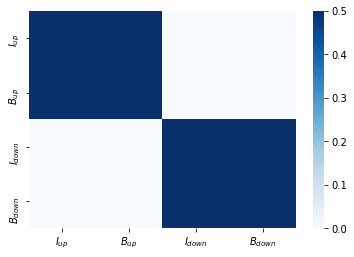

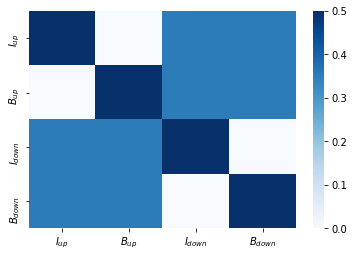

In [8]:
rho1=(dms.get_rho_from_u(dms.potential))
print_rho(np.abs(rho1),name="u_0.eps")

rho2=(dms.get_rho_impurity())
print_rho(np.abs(rho2))

dms.density_norm(rho1,rho2)

                $I_{up}$      $B_{up}$    $I_{down}$    $B_{down}$
$I_{up}$   -8.796763e-10  4.858515e-08 -9.340861e-13 -1.776357e-15
$B_{up}$    4.858515e-08 -8.796762e-10 -9.344192e-13 -1.665335e-15
$I_{down}$ -9.340861e-13 -9.344192e-13 -4.770547e-08 -1.505695e-16
$B_{down}$ -1.776357e-15 -1.665335e-15 -1.229726e-16  4.946482e-08


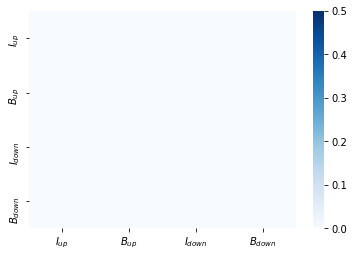

In [9]:
# test des rotations
impurity_index=[1]
rho_imp=(dms.get_rho_impurity())
B=dms.get_schmidt_orbitals()
rho=(dms.get_rho_from_u(dms.potential))
rho_tilda = np.matmul(np.matmul(np.transpose(B),rho),np.conjugate(B))
print_rho(np.abs(rho_tilda)-np.abs(np.abs(rho_imp)))


Remarque : il faut toujours se méfier du signe devant l'élément ! D'une base à l'autre, l'état peut prendre un moins selon l'ordre dans la base

Remarque, on ne s'attend à avoir quelque chose de correct que sur l'impurité

## Second system U = t

In [17]:
#Create the lattice
ls=2
lattice = HC_Lattice(height=ls, length=ls)
# initialize DMET_solver
n=2
print(n)
t=1
u=1*t
lattice_size=[ls,ls]
#solve the system
dms = DMET_solver( t, u, n, lattice_size,[1],[1,2])
print(dms.get_schmidt_orbitals())


2
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.-0.j 1.+0.j]]


In [18]:
dms.solve_system(verbose=False)


Last potential's move : 25.86222165230208
density dif : 1.3649484825500988
Last potential's move : 1.5511679900430417
density dif : 1.1355660246421553
Last potential's move : 1.333093779787034
density dif : 1.1130057929037422
Last potential's move : 1.297311946908865
density dif : 1.1358583150796768
Last potential's move : 1.089180961531919
density dif : 1.0327805053009973
Last potential's move : 1.0758769481444386
density dif : 1.0082807315373272
Last potential's move : 1.1409988004957827
density dif : 0.9841467528803461
Last potential's move : 1.128897515872943
density dif : 0.9605207992821947
Last potential's move : 0.9371480436166301
density dif : 0.9415342137615806
Last potential's move : 1.1351206287188058
density dif : 0.918221065638392
Last potential's move : 0.9741755909979659
density dif : 0.8993984592100557
Last potential's move : 0.9787892944778247
density dif : 0.8807662872038644
Last potential's move : 0.9869103459415397
density dif : 0.8633279244066002
Last potential's m

Last potential's move : 1.8306538905098932
density dif : 0.023057042168968967
Last potential's move : 1.9221865850353836
density dif : 0.022898742487862035
Last potential's move : 4.691721637883323
density dif : 0.021260558800188803
Last potential's move : 2.0583581537894986
density dif : 0.021851802726331214
Last potential's move : 11.11266975355684
density dif : 0.02068693163264431
Last potential's move : 2.260623756772418
density dif : 0.02056076769502848
Last potential's move : 7.939926132624563
density dif : 0.018771792640630273
Last potential's move : 2.4484733309328846
density dif : 0.020156203120961908
Last potential's move : 3.6293396282147135
density dif : 0.017848205982376315
Last potential's move : 2.6030332099480233
density dif : 0.018310595037038392
Last potential's move : 3.6033363910443867
density dif : 0.01707545996009494
Last potential's move : 2.0822551716179265
density dif : 0.01704404217479622
Last potential's move : 12.324767557431326
density dif : 0.0156474268230

[[ 1.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j  ]
 [ 0.  +0.j    0.  +0.j   -0.67-0.22j  0.02+0.71j]
 [ 0.  +0.j    1.  +0.j    0.  +0.j    0.  +0.j  ]
 [ 0.  +0.j    0.  +0.j    0.67+0.22j  0.02+0.71j]]
            $I_{up}$  $B_{up}$  $I_{down}$  $B_{down}$
$I_{up}$    0.465392  0.231200    0.050355    0.243849
$B_{up}$    0.231200  0.534608    0.243849    0.050355
$I_{down}$  0.050355  0.243849    0.465392    0.231200
$B_{down}$  0.243849  0.050355    0.231200    0.534608
                $I_{up}$      $B_{up}$    $I_{down}$    $B_{down}$
$I_{up}$    5.000000e-01  1.734723e-16  3.429972e-01  3.429972e-01
$B_{up}$    1.734723e-16  5.000000e-01  3.429972e-01  3.429972e-01
$I_{down}$  3.429972e-01  3.429972e-01  5.000000e-01  1.217455e-15
$B_{down}$  3.429972e-01  3.429972e-01  1.217455e-15  5.000000e-01


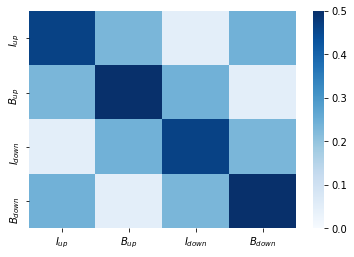

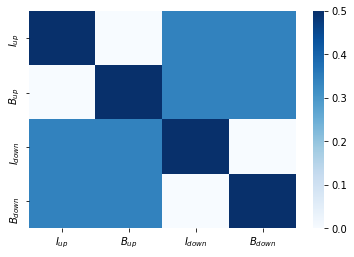

In [12]:
rho=dms.get_rho_from_u(dms.potential)
print (np.around(dms.get_schmidt_orbitals(),2))
print_rho(np.abs(rho),name="u_t.eps",vmin=0,vmax=0.5)
rho_imp = dms.get_rho_impurity()
print_rho(np.abs(rho_imp),name="u_t.eps",vmin=0,vmax=0.5)


1
[[ 1.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j  ]
 [ 0.  +0.j    0.  +0.j   -0.67-0.22j  0.02+0.71j]
 [ 0.  +0.j    1.  +0.j    0.  +0.j    0.  +0.j  ]
 [ 0.  +0.j    0.  +0.j    0.67+0.22j  0.02+0.71j]]
                $I_{up}$      $B_{up}$    $I_{down}$    $B_{down}$
$I_{up}$    5.000000e-01  1.734723e-16  3.429972e-01  3.429972e-01
$B_{up}$    1.734723e-16  5.000000e-01  3.429972e-01  3.429972e-01
$I_{down}$  3.429972e-01  3.429972e-01  5.000000e-01  1.217455e-15
$B_{down}$  3.429972e-01  3.429972e-01  1.217455e-15  5.000000e-01
                $I_{up}$      $B_{up}$    $I_{down}$    $B_{down}$
$I_{up}$    5.000000e-01  4.850713e-01  1.734723e-16  6.573958e-17
$B_{up}$    4.850713e-01  5.000000e-01  5.721958e-17  2.989367e-16
$I_{down}$  1.734723e-16  5.938015e-17  5.000000e-01  4.850713e-01
$B_{down}$  6.206335e-17  2.792851e-16  4.850713e-01  5.000000e-01


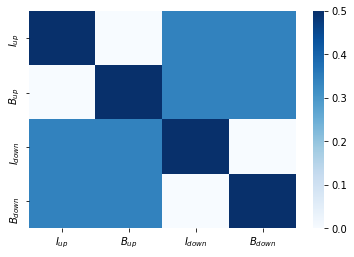

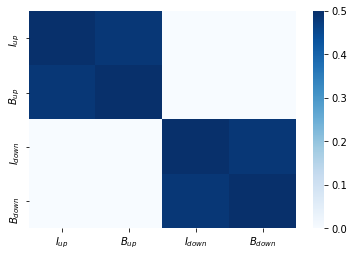

In [13]:
import scipy
# test des rotations
print(dms.u)
impurity_index=[1]
rho_imp=(dms.get_rho_impurity(verbose=False))
# We must then get the schmidt orbitals
B = dms.get_schmidt_orbitals()
# And rotate the matrix into the original basis
rho_imp_tilda = scipy.matmul(rho_imp,(np.transpose(B)))
rho_imp_tilda = scipy.matmul(np.conjugate(B),rho_imp_tilda)

print(np.around(B,2))
#print(np.around(np.matmul(B,np.conjugate(np.transpose(B))),2))
#rho_imp_tilda = np.matmul(np.matmul(np.conjugate(B),rho_imp),np.transpose(B))

rho=(dms.get_rho_from_u(dms.potential))
rho_tilda = np.matmul(np.matmul(np.transpose(B),rho),np.conjugate(B))
#print_rho(rho_imp)
#print_rho(np.real(rho_tilda))
#print_rho(np.real(rho_tilda)-rho_imp)
#print_rho(rho)
print_rho(np.abs(rho_imp),0,0.5)
print_rho(np.abs(rho_imp_tilda),0,0.5)

gs_or=(dms.get_ground_state())

In [14]:
import gmpy2
## Now try with a rotation 
m=1j/np.sqrt(2)
B=np.asarray([[1, 0, 0, 0],[0 ,0, m, -m],[0 ,1, 0, 0],[0 ,0, m, m]])
print(B)

imp_solv = Impurity_solver(dms.t, dms.u, dms.mu, B, dms.lattice_size, [1])
gs = imp_solv.get_ground_state()
print(gs)
print(gs_or)
impurity_index=[1]
v=gs[0]
rho=np.zeros([4*len(impurity_index),4*len(impurity_index)],dtype=complex)
for i in np.arange(4*len(impurity_index),dtype=int):
    # iterate over all impurity+bath positions j
    for j in np.arange(4*len(impurity_index),dtype=int):
        #iterate over all elements in the basis of the Fock space
        for k in np.arange(2**(4*len(impurity_index)),dtype=int):
            #check if a+i aj|k> is not null
            if(gmpy2.bit_test(int(k),int(j))):
                if(gmpy2.bit_test(int(k),int(i))==0 or i==j):
                    new_state=gmpy2.bit_flip(int(k),int(j))
                    new_state=gmpy2.bit_flip(new_state,int(i))
                    #and don't forget the sign !
                    occupancy_between=0
                    for l in np.arange(min(i,j)+1,max(i,j)):
                        occupancy_between+=gmpy2.bit_test(int(k),int(l))
                    if(i==0 and j==2):
                        print("add the term : "+str((-1)**occupancy_between*np.conjugate(v[new_state])*v[k]))
                    rho[i,j]+=(-1)**occupancy_between*np.conjugate(v[new_state])*v[k]
rho_imp_tilda = scipy.matmul(rho,(np.transpose(B)))
rho_imp_tilda = scipy.matmul(np.conjugate(B),rho_imp_tilda)
print(rho_imp_tilda)


[[ 1.+0.j          0.+0.j          0.+0.j          0.+0.j        ]
 [ 0.+0.j          0.+0.j          0.+0.70710678j -0.-0.70710678j]
 [ 0.+0.j          1.+0.j          0.+0.j          0.+0.j        ]
 [ 0.+0.j          0.+0.j          0.+0.70710678j  0.+0.70710678j]]
[array([ 0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.43516215-0.j        ,
        0.        +0.j        ,  0.        -0.39410272j,
        0.        +0.39410272j,  0.        +0.j        ,
        0.        +0.j        ,  0.        -0.39410272j,
        0.        -0.39410272j,  0.        +0.j        ,
       -0.43516215+0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ])]
[array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
       -1.88955038e-17-7.04805577e-18j, -4.32915296e-01-4.41637853e-02j,
       -3.28060875e-17-3.35084046e-18j, -3.85177169e-01+8.33996507e-02j,
       -3.85177169e-01+8.33996507e-02j, -5.55111512e

In [15]:
def get_double_occupancy(Q, i):
    '''
    Compute <ni_up ni_down>
    :param: Q is a 2nxn matrix, whose columns are the occupied eigenstates of H_MF
    :param: i is an integer, corresponding to the site of interest
    :return: double_occupancy is the expected double occupancy on site i
    '''
    # Get the 2 rows of Q corresponding to site i
    n = int(len(Q[:, 0]) / 2)
    O = Q[[i, i + n], :].copy()
    # Perform the singular value decomposition of O
    U, s, Vh = scipy.linalg.svd(O)
    V = np.transpose(Vh)
    # S=np.zeros( [len(U),len(Vh)])
    # for i in np.arange(len(U)):
    #    S[i,i]=s[i]
    # print(np.matmul(np.matmul(U,S),Vh))
    # Perform the rotation
    Q_tilde = np.matmul(Q, V)
    # return the expected double occupancy
    return (Q_tilde[i, 1] * Q_tilde[i + n, 0] - Q_tilde[i + n, 1] * Q_tilde[i, 0]) ** 2


def get_mean_double_occupancy(Q, n_el):
    d = []
    for i in dms.impurity_sites:
        d.append(get_double_occupancy(Q, i))
    return np.mean(d)


def squared_staggered_magnetization(Q, n_el):
    rho = np.matmul(Q, np.conjugate(np.transpose(Q)))  # single particle density function
    mean_occ = np.diag(rho)
    m = 0
    n = int(n_el)

    for i in dms.impurity_sites:
        [x, y] = lattice.find_site(i + 1)
        y = y % 2  # sublattice A is on odd columns, B on even
        signe = (-1) ** y[0]
        m += signe * (mean_occ[i] - mean_occ[i + n])
    return np.real(np.abs(m / n) ** 2)



## Double degeneracy 

In [16]:
n_points=15
D=np.zeros([n_points])
d=[]
m=[]
t=1
for [i,u] in enumerate(np.linspace(0,8*t,n_points)):
    print("new u = "+str(u))
    dms = DMET_solver( t, u, n, lattice_size,[1],[1,2])
    dms.solve_system(False)
    imp_solv = Impurity_solver(dms.t, dms.u, dms.mu, dms.get_schmidt_orbitals(), dms.lattice_size, [1])
    gs=imp_solv.get_ground_state()
    gs=gs[0]
    # with ED
    D[i] = np.sum([ gs[j]*np.conjugate(gs[j]) for j in [3,12] ])
    # with mf 
    Q=dms.get_mean_field_orbitals(dms.potential)
    d.append(get_mean_double_occupancy(Q[:,:n],n))
    m.append(squared_staggered_magnetization(Q[:,:n],n))


new u = 0.0
Last potential's move : 10.315690302062107
density dif : 1.3959657416818876
Last potential's move : 0.4149340271865657
density dif : 1.113915592503291
Last potential's move : 0.39102289192217277
density dif : 1.1029204637058274
Last potential's move : 0.3975392205439831
density dif : 1.080575849425629
Last potential's move : 0.3949158589126206
density dif : 1.0905793142256082
Last potential's move : 0.33295838103001907
density dif : 1.0489201322042356
Last potential's move : 0.33400191275815755
density dif : 1.0596078047295574
Last potential's move : 0.3361718527696555
density dif : 1.0658268109048958
Last potential's move : 0.33023415227655456
density dif : 1.0221168961213203
Last potential's move : 0.30503016698339963
density dif : 1.0185951627038627
Last potential's move : 0.375981410199813
density dif : 1.0077568827961103
Last potential's move : 0.3862242725399795
density dif : 1.0166287808137373
Last potential's move : 0.3549976487253306
density dif : 1.184943911440063

Last potential's move : 0.2485638074704537
density dif : 0.6547582985871614
Last potential's move : 0.2787574965334099
density dif : 0.65386092265697
Last potential's move : 0.31102128092764225
density dif : 0.6524846434253856
Last potential's move : 0.21705028709838534
density dif : 0.6508745345558065
Last potential's move : 0.2722183795209537
density dif : 0.648791049193058
Last potential's move : 0.4354508854782691
density dif : 0.6616537443854812
Last potential's move : 0.3798361163442325
density dif : 0.6523204726002434
Last potential's move : 0.23909770012990633
density dif : 0.6450000369643909
Last potential's move : 0.2508953240042236
density dif : 0.6428555698395411
Last potential's move : 0.7934664850490051
density dif : 0.6760171252702728
Last potential's move : 0.8111010746397994
density dif : 0.7060527479844261
Last potential's move : 0.3924172451001217
density dif : 0.6370844586492134
Last potential's move : 0.6875873905591426
density dif : 0.6610257474443334
Last potenti

Last potential's move : 0.04504489844670639
density dif : 0.2077594928595014
Last potential's move : 0.027566833744685267
density dif : 0.20047348336201432
Last potential's move : 0.046727716954565346
density dif : 0.1830342181552554
Last potential's move : 0.03246111741730918
density dif : 0.1801380504306043
Last potential's move : 0.046377110575444004
density dif : 0.18112819736852265
Last potential's move : 0.026828366511067625
density dif : 0.18253347210437137
Last potential's move : 0.04455191733806118
density dif : 0.17735192198219354
Last potential's move : 0.02696691120642566
density dif : 0.17272846436039416
Last potential's move : 0.043484015058453264
density dif : 0.17474349725265848
Last potential's move : 0.04484026874089133
density dif : 0.16824236240486867
Last potential's move : 0.025916510425040333
density dif : 0.16577482131449997
Last potential's move : 0.0379251892240658
density dif : 0.16477217650417708
Last potential's move : 0.020310116506102746
density dif : 0.1

/home/romain/.conda/envs/DRL/lib/python3.6/site-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


Last potential's move : 0.7003767748663384
density dif : 0.7776787470259525
Last potential's move : 0.6530930717430172
density dif : 0.759544562244207
Last potential's move : 0.6097617469521296
density dif : 0.7393743191417741
Last potential's move : 0.5701501805335771
density dif : 0.7174159395022546
Last potential's move : 0.45286042113699343
density dif : 0.6973903268461531
Last potential's move : 0.4283954406018164
density dif : 0.6758058453743238
Last potential's move : 0.2967805240567736
density dif : 0.6538498129384358
Last potential's move : 0.4664300888233278
density dif : 0.6240998254873031
Last potential's move : 0.3765610968548514
density dif : 0.5975556193724157
Last potential's move : 0.3587264665863233
density dif : 0.5707920664885335
Last potential's move : 0.34263087108065904
density dif : 0.5392100752812103
Last potential's move : 0.27289004200224576
density dif : 0.5080916074545935
Last potential's move : 0.3794493891854538
density dif : 0.46886124744779
Last potenti

Last potential's move : 0.308427678625733
density dif : 0.7872764762619452
Last potential's move : 0.2616339085524884
density dif : 0.7168424612680246
Last potential's move : 0.24316063891130707
density dif : 0.7217900542037031
Last potential's move : 0.3191408293943844
density dif : 0.8829614417306701
Last potential's move : 0.26494841847629996
density dif : 0.8050713500152065
Last potential's move : 0.31611490288792393
density dif : 0.711666741186695
Last potential's move : 0.2613400914371938
density dif : 0.7695763852816941
Last potential's move : 0.30685706020133235
density dif : 0.7184824004371233
Last potential's move : 0.27263136518754494
density dif : 1.1431020783698198
Last potential's move : 0.2944514972155661
density dif : 1.2618918193739719
Last potential's move : 0.32093219125697886
density dif : 0.8250580822570561
Last potential's move : 0.32570028589972366
density dif : 0.6847820358689357
Last potential's move : 0.35519165551012377
density dif : 1.1559174961186567
Last p

Last potential's move : 0.8935141344149322
density dif : 0.43352585846581565
Last potential's move : 0.9381898411356779
density dif : 0.42309996482687373
Last potential's move : 0.985099333192462
density dif : 0.41234616717250316
Last potential's move : 1.0343542998520867
density dif : 0.51849820340254
Last potential's move : 1.0860720148446887
density dif : 0.5181066944628738
Last potential's move : 1.1403756155869225
density dif : 0.37932136478698214
Last potential's move : 1.1973943963662705
density dif : 0.3664994790852602
Last potential's move : 1.257264116184583
density dif : 0.3549042852989532
Last potential's move : 1.3201273219938123
density dif : 0.3424542005914651
Last potential's move : 1.386133688093505
density dif : 0.33022014179122666
Last potential's move : 1.4554403724981775
density dif : 0.49574252950042424
Last potential's move : 1.5282123911230912
density dif : 0.5016787370204411
Last potential's move : 1.6046230106792407
density dif : 0.29559568563137495
Last poten

Last potential's move : 1.3613290533458686
density dif : 0.010333618309697394
Last potential's move : 1.488871007341079
density dif : 0.010708841578024896
Last potential's move : 2.293258865945216
density dif : 0.01012716634459329
Last potential's move : 1.4993432307468817
density dif : 0.00982122319397496
Last potential's move : 1.3433769684111736
density dif : 0.009626637861804689
Last potential's move : 0.9034862866864048
density dif : 0.013592338452188237
Last potential's move : 1.424013461687944
density dif : 0.013399052742401527
Last potential's move : 0.8241487029944765
density dif : 0.009335490167668763
Last potential's move : 0.9408117399228132
density dif : 0.009273844857722174
Last potential's move : 2.2455186547697763
density dif : 0.009052541795905741
Last potential's move : 1.5394555778557903
density dif : 0.008977156945075702
Last potential's move : 0.7832123878724577
density dif : 0.010240033995162455
Last potential's move : 0.7943609743040302
density dif : 0.0094691907

Last potential's move : 0.46682895281561865
density dif : 0.004641120085691836
Last potential's move : 0.4718305191969448
density dif : 0.004710560262414025
Last potential's move : 0.5004411784563184
density dif : 0.013772840546601635
Last potential's move : 0.47808851171900363
density dif : 0.05689386637435216
Last potential's move : 0.4736503325309119
density dif : 0.04422350546850635
Last potential's move : 0.6084345185506509
density dif : 0.004394747393013473
Last potential's move : 0.4687982056046265
density dif : 0.004288782518538769
Last potential's move : 0.47418156189981203
density dif : 0.004359558211576251
Last potential's move : 0.5011261520876266
density dif : 0.0042757462454676345
Last potential's move : 0.48010606466848815
density dif : 0.004249937400874232
Last potential's move : 0.4759830485333338
density dif : 0.004206082302117008
Last potential's move : 0.6031388351517575
density dif : 0.0041758148947318285
Last potential's move : 0.47083255325096335
density dif : 0.

Last potential's move : 0.016416709566689613
density dif : 0.47920526755802295
Last potential's move : 0.017237545045024116
density dif : 0.4780313204890217
Last potential's move : 0.14838895855329684
density dif : 0.47679230305125264
Last potential's move : 0.01825339307723478
density dif : 0.47448399181247036
Last potential's move : 0.10189473274970497
density dif : 0.4733203369287914
Last potential's move : 0.019375713588957122
density dif : 0.4716717486075025
Last potential's move : 0.02034449926840498
density dif : 0.4702813231066789
Last potential's move : 0.021361724231825252
density dif : 0.46963222669411026
Last potential's move : 0.02242981044341652
density dif : 0.46755435054848526
Last potential's move : 0.02355130096558733
density dif : 0.4661383521381084
Last potential's move : 0.024728866013866646
density dif : 0.4641237407322432
Last potential's move : 0.14921572414293158
density dif : 0.46125816439866557
Last potential's move : 0.40384764446938454
density dif : 0.46234

Last potential's move : 0.3868586719069579
density dif : 0.09473030819097934
Last potential's move : 0.29301103134254136
density dif : 0.08969575967577653
Last potential's move : 0.32040476184849775
density dif : 0.08728120822608314
Last potential's move : 0.28330797797732643
density dif : 0.08301933244905839
Last potential's move : 0.3331027805809444
density dif : 0.08065794124131435
Last potential's move : 0.26168199455099117
density dif : 0.07833366742523998
Last potential's move : 0.3388463655939253
density dif : 0.08087594881724407
Last potential's move : 0.35969246531292254
density dif : 0.07826949202233391
Last potential's move : 0.3327304430694277
density dif : 0.07766836172849265
Last potential's move : 0.3059919489930958
density dif : 0.07465228794640505
Last potential's move : 0.23701406096086547
density dif : 0.06873843768579506
Last potential's move : 0.2529044859282232
density dif : 0.06679349075904474
Last potential's move : 0.23879797809737685
density dif : 0.0624932190

KeyboardInterrupt: 

In [ ]:
plt.plot(np.linspace(0,8*t,n_points)/t,D)
plt.xlabel("U/t")
plt.ylabel("<D>")
plt.title("DMET on 2 sites, n=2 ")
plt.savefig("D_u_t.eps")
plt.show()
plt.plot(np.linspace(0,8*t,n_points)/t,np.real(d))
plt.plot(np.linspace(0,8*t,n_points)/t,m)
plt.show()

## n = 3 

In [ ]:
#Create the lattice
ls=2
lattice = HC_Lattice(height=ls, length=ls)
# initialize DMET_solver
n=3
print(n)
t=1
u=4*t

lattice_size=[ls,ls]
#solve the system
dms = DMET_solver( t, u, n, lattice_size)
print(dms.get_schmidt_orbitals([1]))


In [ ]:
dms.solve_system()


In [ ]:
rho_imp = dms.get_rho_impurity([1],True)
print_rho(np.abs(rho_imp))

rho=(dms.get_rho_from_u(dms.potential))
print_rho(np.abs(rho),name="n3_u_4t.eps")